<h1 style='text-align:center;background:blue;padding:20px'>
Building Data Science Model Step By Step With Iris Dataset</h1>

**In this notebook, we will go through building a data science model step by step:**
- Data exploration & preparation
- Model Construction
- Model Utilization

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the dataset
iris_df = pd.read_csv("./Iris.csv", index_col=0)

In [3]:
in_df = iris_df.copy()

<h2 style='text-align:center;background:blue;padding:20px'>
Data Exploration</h2>

In [4]:
in_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
in_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
in_df.shape

(150, 5)

In [7]:
# See variables (faetures)
in_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# a high level overview on variables' data types and ..
in_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


We can see from the above that there is no misused data types

In [9]:
# get some statistics to see how data is distributed
in_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We see that the data is distributed evenly, and they gradualy increased

In [10]:
# Check for missing values
in_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No missing values, so we are good to go.

In [11]:
in_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# the dataset is not bias in terms of target variable
in_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
# map the values of Species variable to 0, 1, 3

in_df['Species'] = in_df['Species'].map({
    'Iris-versicolor': 0,
    'Iris-virginica': 1,
    'Iris-setosa': 2
})

In [14]:
in_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,2
2,4.9,3.0,1.4,0.2,2
3,4.7,3.2,1.3,0.2,2
4,4.6,3.1,1.5,0.2,2
5,5.0,3.6,1.4,0.2,2


In [15]:
in_df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

------------------

[Text(0.5, 1.0, 'Species counts')]

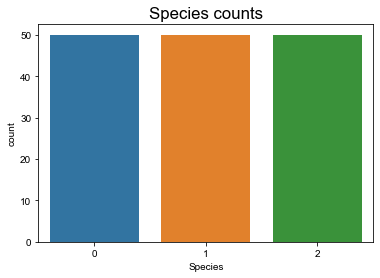

In [16]:
fig = plt.figure()
ax = fig.gca()
sns.countplot(in_df['Species'], ax=ax)
sns.set(color_codes=('r', 'g', 'b'), font_scale=1.4)
ax.set(title='Species counts')

In [17]:
in_df.corr()['Species'].sort_values(ascending=False)

Species          1.000000
SepalWidthCm     0.612165
SepalLengthCm   -0.460039
PetalWidthCm    -0.580749
PetalLengthCm   -0.649101
Name: Species, dtype: float64

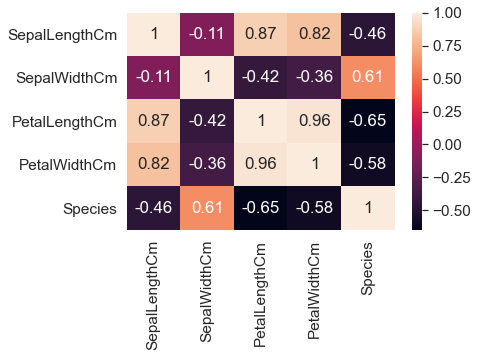

In [18]:
sns.heatmap(in_df.corr(), annot=True)

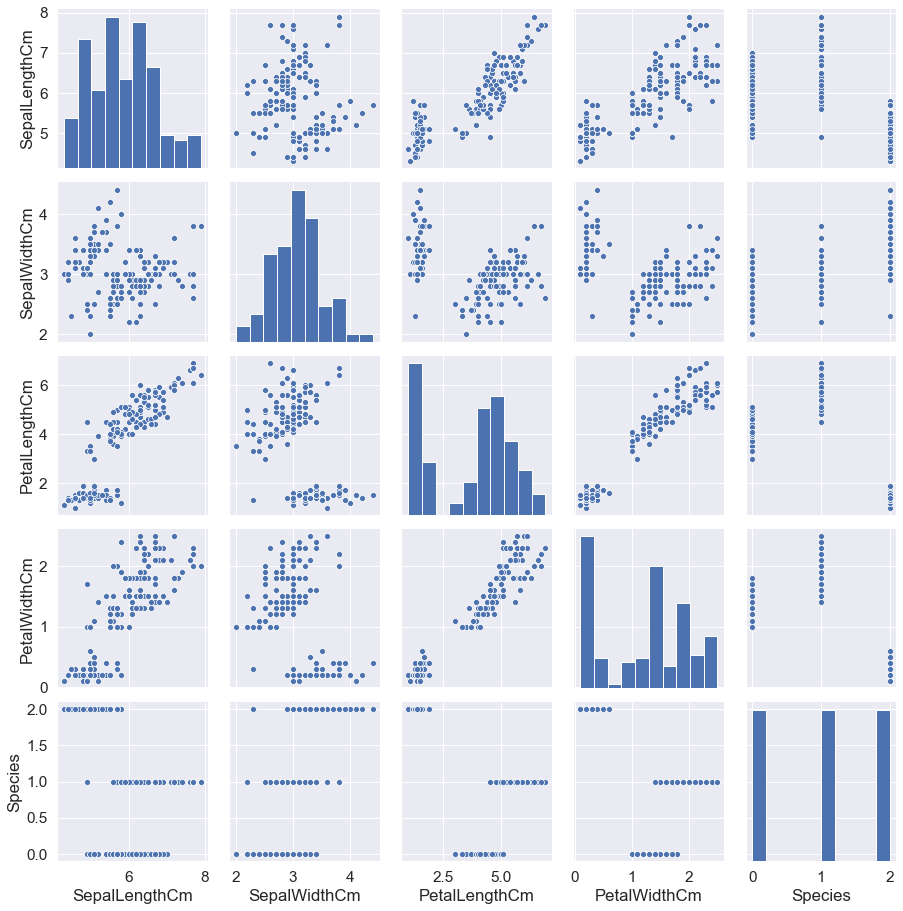

In [19]:
sns.pairplot(in_df, kind='scatter')

##### How Species differ from each other according to the given properties

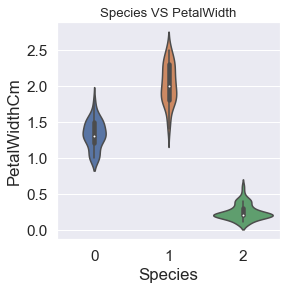

In [20]:
fig = plt.figure(figsize=(4,4))
ax = fig.gca()
# sns.boxplot(x='Species', y='PetalWidthCm', data=in_df, ax=ax)
sns.violinplot(x='Species', y='PetalWidthCm', data=in_df, ax=ax)
sns.set(font_scale=1.1)
ax.set(title='Species VS PetalWidth')
plt.show()

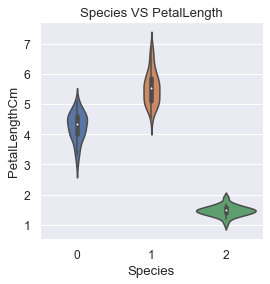

In [21]:
fig = plt.figure(figsize=(4,4))
ax = fig.gca()
sns.violinplot(x='Species', y='PetalLengthCm', data=in_df, ax=ax)
ax.set(title='Species VS PetalLength')
plt.show()

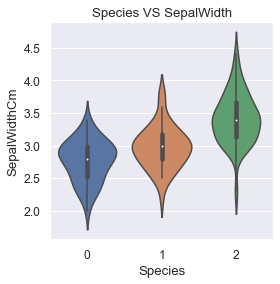

In [22]:
fig = plt.figure(figsize=(4,4))
ax = fig.gca()
sns.violinplot(x='Species', y='SepalWidthCm', data=in_df, ax=ax)
ax.set(title='Species VS SepalWidth')
plt.show()

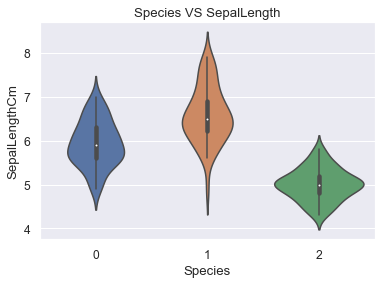

In [23]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()
sns.violinplot(x='Species', y='SepalLengthCm', data=in_df, ax=ax)
ax.set(title='Species VS SepalLength')
plt.show()

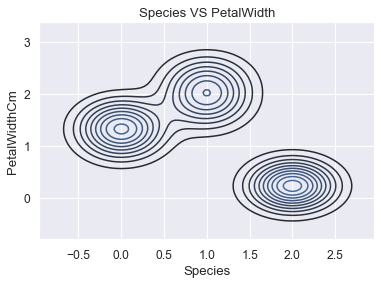

In [24]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()
sns.kdeplot(in_df['Species'], in_df['PetalWidthCm'])
ax.set(title='Species VS PetalWidth')
plt.show()

In [25]:
in_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,2
2,4.9,3.0,1.4,0.2,2
3,4.7,3.2,1.3,0.2,2
4,4.6,3.1,1.5,0.2,2
5,5.0,3.6,1.4,0.2,2


<h2 style='text-align:center;background:blue;padding:20px'>
Model Construction & Utilization</h2>

In [26]:
X = in_df.drop('Species', axis=1)
y = in_df['Species']

In [27]:
# spliting train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=100)

In [28]:
# construct a model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=100)
dt_model = dt.fit(X_train, y_train)

In [29]:
# make a prediction
y_predict = dt_model.predict(X_test)

In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_predict, y_test)

array([[11,  1,  0],
       [ 1, 17,  0],
       [ 0,  0, 20]], dtype=int64)

In [31]:
# Check the accuracy of the model
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_predict, y_test)
print('The model\'s accuracy is: ', round(model_accuracy*100, 2))

The model's accuracy is:  96.0


<h3 style='text-align:center;background:blue;padding:20px'>
Thank you!</h3>